Hi Chris, I am trying to display some statistics for OIS and SOFR rates in ths section.

In [91]:
import numpy as np
import pandas as pd
from IPython.display import Image
from IPython.core.display import HTML

In [92]:
location = "C:\Users\wb512563\OneDrive - WBG\pythonML\ois_sofr.xlsx"
df = pd.read_excel(location)

## SOFR Rate vs Fed Funds Rate<br>

I realised that SOFR Rate is very closely tagged to Fed Funds Rate.<br>
The graph below shows the rates between the SOFR rate and Fed Funds Rate.<br>

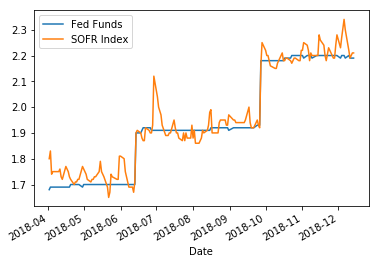

In [93]:
df[["Fed Funds","SOFR Index"]].plot(x=df["Date"])

The picture below shows the announcment dates for the FOMC Meetings.

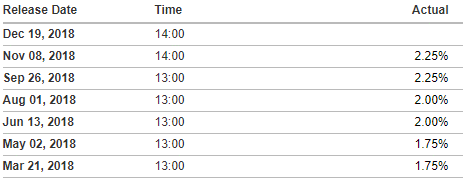

In [53]:
Image(filename= "C:\Users\wb512563\Desktop\Untitled.png", width = 450, height= 450)

It seems that the rates are quite constant during each regime(quarter). <br>
In addition, it seems that SOFR rate is more volatile than Fed Funds Rate by inspection.<br>
So to capture volatility it should make sense to only compute volatility during each regime.<br>
### Historical Volatility

In [85]:
Regime1 = df[(df["Date"] > "2-Apr-2018") & (df["Date"] < "13-June-2018")]
Regime2 = df[(df["Date"] > "13-June-2018") & (df["Date"] < "27-Sep-2018")]
Regime3 = df[(df["Date"] >= "27-Sep-2018")]

R1_vol_SOFR = np.std(Regime1["SOFR Index"].pct_change())*100
R1_vol_OIS = np.std(Regime1["Fed Funds"].pct_change())*100

R2_vol_SOFR = np.std(Regime2["SOFR Index"].pct_change())*100
R2_vol_OIS = np.std(Regime2["Fed Funds"].pct_change())*100

R3_vol_SOFR = np.std(Regime3["SOFR Index"].pct_change())*100
R3_vol_OIS = np.std(Regime3["Fed Funds"].pct_change())*100

d= {"OIS Volatility": [R1_vol_OIS, R2_vol_OIS, R3_vol_OIS], "SOFR Volatility": [R1_vol_SOFR, R2_vol_SOFR, R3_vol_SOFR]}
result = pd.DataFrame(d, index=["Regime 1","Regime 2","Regime 3"])
result

,OIS Volatility,SOFR Volatility
Regime 1,0.145619,1.658775
Regime 2,0.161531,1.848054
Regime 3,0.209476,1.444840


***
## SOFR Swaps vs OIS3M Swaps<br>

The next comparison is about the comparison between SOFR swaps and OIS Swaps. 